<h1> Capstone Project - The Battle of Neighborhoods<h1>
<h2>Recommending System for Opening Businesses in Bogota, Colombia<h2>

<h3> Introduction <h3>
<ul>
<li><p> In this project we will focus on determining the best location to open a new business in Bogota, Colombia (focusing on a book café or similar business)<p>
<li><p> We will have to take into account which are the localities in which this sort of business have a large presence and if there is already a large amount of this kind of business in the vicinity (so as not to have too much competition) <p>
<li><p> Aditionally, since this project is focused on helping people who lost their business due to the covid pandemic, it is important to take into account other factors such as the amount of covid cases in the area (to avoid opening a business in a locality that might implement more restrictions ot lockdowns) and the availability of open spaces (such as nearby parks) so that the business can have an open air segment in order to comply with covid restriction established by the government<p>

<h2> Data Capture/Import <h2>
<p>As a first step we will capture the data needed for the project. This includes:<p>
<ul>
<li>Import data from a .csv file with Bogota´s neighbourhoods names, code and its corresponding locality. Original source <a href="https://es.wikipedia.org/wiki/Unidades_de_Planeamiento_Zonal">here</a>. Save in a pandas dataframe
<li>Import data from a .csv file downloaded from an official government source which includes data from covid cases in Bogota, Colombia. Original source <a href="https://saludata.saludcapital.gov.co/osb/index.php/datos-de-salud/enfermedades-trasmisibles/covid19/">here</a>. Save in a pandas dataframe

<ul>


In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
import pandas as pd
import numpy as np

In [265]:
df_neighborhoods = pd.read_csv("/content/drive/MyDrive/Coursera IBM Data Science/Capstone Project/Bogota Neighbourhoods - Hoja 1.csv")

In [226]:
df_covid = pd.read_csv("/content/drive/MyDrive/Coursera IBM Data Science/Capstone Project/osb_enftransm-covid-19_13072021.csv",sep=";")

<h2>Data Exploration<h2>


In [227]:
df_neighborhoods.head()

,Numero,Nombre,Localidad
0,1,Paseo de los Libertadores,Usaquén
1,9,Verbenal,Usaquén
2,10,La Uribe,Usaquén
3,11,San Cristóbal Norte,Usaquén
4,12,Toberín,Usaquén


In [228]:
df_neighborhoods.dtypes

Numero        int64
Nombre       object
Localidad    object
dtype: object

In [229]:
df_covid.head()

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado


In [230]:
df_covid.dtypes

CASO                            int64
FECHA_DE_INICIO_DE_SINTOMAS    object
FECHA_DIAGNOSTICO              object
CIUDAD                         object
LOCALIDAD_ASIS                 object
EDAD                            int64
UNI_MED                         int64
SEXO                           object
FUENTE_O_TIPO_DE_CONTAGIO      object
UBICACION                      object
ESTADO                         object
dtype: object

In [231]:
#Data Exploration of the city column
df_covid['CIUDAD'].unique()

array(['Bogotá', 'Fuera de Bogotá', 'Sin dato'], dtype=object)

<p> Check if the localities names between dataframes match </p>

In [232]:
df_covid['LOCALIDAD_ASIS'].unique()

array(['Usaquén', 'Engativá', 'Fontibón', 'Kennedy', 'Suba',
       'Teusaquillo', 'Chapinero', 'Ciudad Bolívar', 'Barrios Unidos',
       'Los Mártires', 'La Candelaria', 'Rafael Uribe Uribe',
       'Puente Aranda', 'Tunjuelito', 'Bosa', 'San Cristóbal', 'Santa Fe',
       'Antonio Nariño', 'Usme', 'Fuera de Bogotá', 'Sin dato', 'Sumapaz'],
      dtype=object)

In [233]:
df_neighborhoods['Localidad'].unique()

array(['Usaquén', 'Chapinero', 'Santa Fe', 'San Cristóbal', 'Usme',
       'Tunjuelito', 'Bosa', 'Kennedy', 'Fontibón', 'Engativá', 'Suba',
       'Barrios Unidos', 'Teusaquillo', 'Mártires', 'Antonio Nariño',
       'Puente Aranda', 'La Candelaria', 'Rafael Uribe', 'Ciudad Bolívar'],
      dtype=object)

In [234]:
localities = df_covid['LOCALIDAD_ASIS'].unique()

In [235]:
for index in range(0,localities.size):
  exists1 = localities[index] in df_neighborhoods['Localidad'].values
  print("Localidad {} in the neighbourhoods df: {}".format(localities[index],exists1))

Localidad Usaquén in the neighbourhoods df: True
Localidad Engativá in the neighbourhoods df: True
Localidad Fontibón in the neighbourhoods df: True
Localidad Kennedy in the neighbourhoods df: True
Localidad Suba in the neighbourhoods df: True
Localidad Teusaquillo in the neighbourhoods df: True
Localidad Chapinero in the neighbourhoods df: True
Localidad Ciudad Bolívar in the neighbourhoods df: True
Localidad Barrios Unidos in the neighbourhoods df: True
Localidad Los Mártires in the neighbourhoods df: False
Localidad La Candelaria in the neighbourhoods df: True
Localidad Rafael Uribe Uribe in the neighbourhoods df: False
Localidad Puente Aranda in the neighbourhoods df: True
Localidad Tunjuelito in the neighbourhoods df: True
Localidad Bosa in the neighbourhoods df: True
Localidad San Cristóbal in the neighbourhoods df: True
Localidad Santa Fe in the neighbourhoods df: True
Localidad Antonio Nariño in the neighbourhoods df: True
Localidad Usme in the neighbourhoods df: True
Localidad

<h2> Data Cleaning <h2>
<p> We will now focus on cleaning the localities and covid data by dropping the columns in the dataframe that we will not be using <p>
<p><b> For covid data </b>
<ul>
<li>We will only be needing the day the citizen was diagnosed with covid (fecha_diagnostico) and the locality where the citizen lives (localidad_asis)
<li>Since there is data of citizens that live outside of Bogota (our target city) and citizens with no city data, we need to delete these records since these are not useful for our project
<li>The diagnosis date (fecha_diagnostico) is type object, we'll nedd to change the type to date
<li> Group the data so that the amount of covid cases per month/year and Locality is shown
</ul>
<p> Since the names of the localities do not have the same format/structure we need to convert them so that we can match them between dataframes when needed
<p> The column names are in spanish, we will rename these columns to their respective names in english



In [236]:
df_neighborhoods.head()

,Numero,Nombre,Localidad
0,1,Paseo de los Libertadores,Usaquén
1,9,Verbenal,Usaquén
2,10,La Uribe,Usaquén
3,11,San Cristóbal Norte,Usaquén
4,12,Toberín,Usaquén


In [267]:
df_neighborhoods.rename(columns={'Numero':'Number','Nombre':'Neighborhood','Localidad':'Locality'},inplace=True)

In [268]:
df_neighborhoods.head()

,Number,Neighborhood,Locality
0,1,Paseo de los Libertadores,Usaquén
1,9,Verbenal,Usaquén
2,10,La Uribe,Usaquén
3,11,San Cristóbal Norte,Usaquén
4,12,Toberín,Usaquén


In [239]:
df_covid.drop(df_covid[df_covid['CIUDAD']!='Bogotá'].index, inplace=True)

In [240]:
df_covid['CIUDAD'].unique()

array(['Bogotá'], dtype=object)

In [241]:
df_covid.drop(columns=['CASO','FECHA_DE_INICIO_DE_SINTOMAS','CIUDAD','EDAD','UNI_MED','SEXO','FUENTE_O_TIPO_DE_CONTAGIO','UBICACION','ESTADO'], inplace=True)

In [242]:
df_covid.head()

,FECHA_DIAGNOSTICO,LOCALIDAD_ASIS
0,2020-03-06,Usaquén
1,2020-03-10,Engativá
2,2020-03-10,Engativá
3,2020-03-12,Fontibón
4,2020-03-12,Kennedy


In [243]:
df_covid.rename(columns={'FECHA_DIAGNOSTICO':'Diagnosis_date',"LOCALIDAD_ASIS":'Locality'},inplace=True)

In [244]:
df_covid['Diagnosis_date'] = pd.to_datetime(df_covid['Diagnosis_date'])

In [245]:
df_covid.dtypes

Diagnosis_date    datetime64[ns]
Locality                  object
dtype: object

In [246]:
df_covid.head()

,Diagnosis_date,Locality
0,2020-03-06,Usaquén
1,2020-03-10,Engativá
2,2020-03-10,Engativá
3,2020-03-12,Fontibón
4,2020-03-12,Kennedy


In [247]:
df_covid['month_year'] = pd.to_datetime(df_covid['Diagnosis_date']).dt.to_period('M')
df_covid.head()

,Diagnosis_date,Locality,month_year
0,2020-03-06,Usaquén,2020-03
1,2020-03-10,Engativá,2020-03
2,2020-03-10,Engativá,2020-03
3,2020-03-12,Fontibón,2020-03
4,2020-03-12,Kennedy,2020-03


In [248]:
df_covid2 = df_covid.drop(columns=['Diagnosis_date'])

In [249]:
df_covid2 = df_covid2.groupby(['Locality','month_year']).size().reset_index()

In [250]:
df_covid2.rename(columns={0:"Cases Diagnosed"},inplace=True)

In [251]:
df_covid2['month_year'] = df_covid2['month_year'].astype(str)
df_covid2['month_year'] = pd.to_datetime(df_covid2['month_year'])

In [156]:
df_covid['Locality'] = df_covid['Locality'].str.lower()
df_neighborhoods['Locality'] = df_neighborhoods['Locality'].str.lower()

In [157]:
localities = df_covid['Locality'].unique()
for index in range(0,localities.size):
  exists1 = localities[index] in df_neighborhoods['Locality'].values
  print("Localidad {} in the neighbourhoods df: {}".format(localities[index],exists1))

Localidad usaquén in the neighbourhoods df: True
Localidad engativá in the neighbourhoods df: True
Localidad fontibón in the neighbourhoods df: True
Localidad kennedy in the neighbourhoods df: True
Localidad suba in the neighbourhoods df: True
Localidad teusaquillo in the neighbourhoods df: True
Localidad chapinero in the neighbourhoods df: True
Localidad ciudad bolívar in the neighbourhoods df: True
Localidad barrios unidos in the neighbourhoods df: True
Localidad los mártires in the neighbourhoods df: False
Localidad la candelaria in the neighbourhoods df: True
Localidad rafael uribe uribe in the neighbourhoods df: False
Localidad puente aranda in the neighbourhoods df: True
Localidad tunjuelito in the neighbourhoods df: True
Localidad bosa in the neighbourhoods df: True
Localidad san cristóbal in the neighbourhoods df: True
Localidad santa fe in the neighbourhoods df: True
Localidad antonio nariño in the neighbourhoods df: True
Localidad usme in the neighbourhoods df: True
Localidad

In [269]:
#In our neighbourhoods df, locality "Rafael Uribe Uribe" appears as "Rafael Uribe". Let's change that
df_neighborhoods['Locality'] = df_neighborhoods['Locality'].replace(['rafael uribe'],'rafael uribe uribe')

In [270]:
#In our neighbourhoods df, locality "Los Mártires" appears as "Mártires". Let's change that
df_neighborhoods['Locality'] = df_neighborhoods['Locality'].replace(['mártires'],'los mártires')

In [160]:
#Unfortunately, we don't have much information about the neighbourhoods in the locality Sumapaz, so we'll delete these records from our dataframes
df_covid.drop(df_covid[df_covid['Locality']=='sumapaz'].index, inplace=True)

<h1>Data Capture II<h1>
<h2> Get location data for our neighborhoods <h2>
<p> Create a function using the geocoder and geopy libraries so that we can get and add the location of the neighbourhoods to our dataframe <p>

In [161]:
!pip install geocoder
!pip install geopy
import geocoder
from geopy.geocoders import Nominatim

In [162]:
def get_location(neighbourhood):
  address = neighbourhood+',Bogota, Colombia'

  geolocator = Nominatim(user_agent="mygeocoder")
  location = geolocator.geocode(address)
  latitude = location.latitude
  longitude = location.longitude
  return(latitude,longitude)

In [163]:
#Create lists to storage the information returned by our function
#Use exception handling because some addresses might not be found 
lat_list = []
lon_list = []

for i in range(0,df_neighborhoods.shape[0]):
  try:
    lat,lon = get_location(df_neighborhoods['Neighborhood'][i])
    lat_list.append(lat)
    lon_list.append(lon)
  except:
    lat_list.append(0)
    lon_list.append(0)


In [273]:
#Add lists to our neighbourhoods data as new columns
df_neighborhoods['Latitude'] = lat_list
df_neighborhoods['Longitude'] = lon_list

In [274]:
df_neighborhoods.head()

,Number,Neighborhood,Locality,Latitude,Longitude
0,1,Paseo de los Libertadores,Usaquén,0.000000,0.000000
1,9,Verbenal,Usaquén,4.765150,-74.038394
2,10,La Uribe,Usaquén,4.752400,-74.045013
3,11,San Cristóbal Norte,Usaquén,4.734501,-74.017543
4,12,Toberín,Usaquén,4.747274,-74.043719


In [275]:
#Neighbourhoods which our function couldn't find
df_neighborhoods[df_neighborhoods['Longitude']==0]

,Number,Neighborhood,Locality,Latitude,Longitude
0,1,Paseo de los Libertadores,Usaquén,0.0,0.0
10,89,San Isidro-Patios,Chapinero,0.0,0.0
20,33,Sociego,San Cristóbal,0.0,0.0
30,61,Ciudad Usme,Usme,0.0,0.0
53,110,Ciudad Salitre Occidente,Fontibón,0.0,0.0
69,17,San José de Bavaria,Suba,0.0,0.0


<p> Since there are just a few neighbourhoods for which our function couldn't retrieve the location information; We can search and add this information manually </p>

In [276]:
df_neighborhoods.loc[0,['Latitude','Longitude']] = [4.791482,-74.03373]
df_neighborhoods.loc[10,['Latitude','Longitude']] = [4.667742,-74.01946]
df_neighborhoods.loc[20,['Latitude','Longitude']] = [4.578078,-74.08552]
df_neighborhoods.loc[30,['Latitude','Longitude']] = [4.479657,-74.111202]
#df_neighborhoods.loc[51,['Latitude','Longitude']] = [4.694824,-74.16060]
df_neighborhoods.loc[53,['Latitude','Longitude']] = [4.655403,-74.111695]
df_neighborhoods.loc[69,['Latitude','Longitude']] = [4.585334, -74.17093]

In [277]:
df_neighborhoods[df_neighborhoods['Longitude']==0]

,Number,Neighborhood,Locality,Latitude,Longitude


<h3> Capture venues data with FourSquare API <h3>

In [169]:
import json 
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import random 
import numpy as np 
import matplotlib.pyplot as plt 

In [170]:
#Foursquare credentials for API calls
#Hidden cell for notebook sharing

<p> Create a function to get the venues from each neighbourhood </p>

In [171]:
#Function to get venues of a neighborhood

def getTargetVenues(names, latitudes, longitudes,radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
          CLIENT_ID, 
          CLIENT_SECRET, 
          VERSION, 
          lat, 
          lng, 
          '4bf58dd8d48988d16d941735,4bf58dd8d48988d114951735,4bf58dd8d48988d163941735',
          radius, 
          LIMIT)
            
        # make the GET request
        try:
          results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
          print(name + 'had an error')
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['categories'][0]['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Id']
    
    return(nearby_venues)

In [172]:
#Create venues Dataframe with the venues of interest (Bookshops, Coffe Places, Parks)
bogota_venues = getTargetVenues(names=df_neighborhoods['Neighborhood'],
                                 latitudes=df_neighborhoods['Latitude'],
                                 longitudes=df_neighborhoods['Longitude'])

Paseo de los Libertadores
Verbenal
La Uribe
San Cristóbal Norte
Toberín
Los Cedros
Usaquén
Country Club
Santa Bárbara
El Refugio
San Isidro-Patios
Pardo Rubio
Chicó Lago
Chapinero
Sagrado Corazón
La Macarena
Las Nieves
Las Cruces
Lourdes
San Blas
Sociego
20 de Julio
La Gloria
Los Libertadores
La Flora
Danubio
Gran Yomasa
Comuneros
Alfonso López
Parque Entrenubes
Ciudad Usme
Venecia
Tunjuelito
Apogeo
Bosa Occidental
Bosa Central
El Porvenir
Tintal Sur
Castilla
Américas
Carvajal
Kennedy Central
Timiza
Tintal Norte
Calandaima
Corabastos
Gran Britalia
Patio Bonito
Las Margaritas
Bavaria
Fontibón
Fontibón-San Pablo
Zona Franca
Ciudad Salitre Occidente
Granjas de Techo
Modelia
Capellanía
Aeropuerto Eldorado
Las Ferias
Minuto de Dios
Boyacá Real
Santa Cecilia
Bolivia
Garcés Navas
Engativá
Jardín Botánico
Álamos
La Academia
Guaymaral
San José de Bavaria
Britalia
El Prado
La Alhambra
Casablanca Suba
Niza
La Floresta
Suba
El Rincón
Tibabuyes
Los Andes
12 de Octubre
Los Alcázares
Parque Salitre
G

In [173]:
#Save our dataframes in case we need them later on or for other projects
bogota_venues.to_csv("/content/drive/MyDrive/Coursera IBM Data Science/Capstone Project/bogota_target_venues.csv",index=False)

In [174]:
bogota_venues = pd.read_csv("/content/drive/MyDrive/Coursera IBM Data Science/Capstone Project/bogota_target_venues.csv")

In [175]:
bogota_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Id
0,Verbenal,4.76515,-74.038394,Juan Valdez Café,4.762551,-74.045620,Café,4bf58dd8d48988d16d941735
1,Verbenal,4.76515,-74.038394,Crepes & Waffles,4.762301,-74.045801,Café,4bf58dd8d48988d16d941735
2,Verbenal,4.76515,-74.038394,Juan Valdez Café,4.762868,-74.045356,Café,4bf58dd8d48988d16d941735
3,Verbenal,4.76515,-74.038394,"Librería Nacional, Santafé Mi Mundo - Bogotá",4.761717,-74.045916,Bookstore,4bf58dd8d48988d114951735
4,Verbenal,4.76515,-74.038394,Artesanos,4.762598,-74.045745,Café,4bf58dd8d48988d16d941735


<h1>Data Exploration<h1>
<h3> Mapping Bogota's Localities and Neighbourhoods to get a better understanding of the city<h3>


In [176]:
#Get location of Bogotá, Colombia
address = 'Bogota, Colombia'

geolocator = Nominatim(user_agent="mygeocoder")
location = geolocator.geocode(address)
bog_latitude = location.latitude
bog_longitude = location.longitude

In [177]:
map_bogota = folium.Map(location=[bog_latitude,bog_longitude],zoom_start=10)

for lat,lng,neigh,loc in zip(df_neighborhoods['Latitude'],df_neighborhoods['Longitude'],df_neighborhoods['Neighborhood'],df_neighborhoods['Locality']):
  label = '{}, {}'.format(neigh,loc)
  label = folium.Popup(label,parse_html=True)
  folium.CircleMarker(
      [lat,lng],
      radius=5,
      popup=label,
      color='purple',
      fill=True,
      fill_color='#800080',
      fill_opacity=0.7,
      parse_html=False).add_to(map_bogota)
map_bogota
  

<h3> Map of the venues in each neighborhood <h3>


In [178]:
pd.set_option('display.max_rows',None)
bogota_venues.groupby('Neighborhood').count()['Venue']

Neighborhood
12 de Octubre                4
20 de Julio                  3
Aeropuerto Eldorado         19
Américas                     9
Bavaria                      7
Bolivia                     10
Bosa Central                 1
Boyacá Real                  4
Britalia                     3
Calandaima                   2
Capellanía                   6
Carvajal                     8
Casablanca Suba              1
Castilla                     6
Chapinero                   49
Chicó Lago                  74
Ciudad Jardín                7
Ciudad Montes                3
Ciudad Salitre Occidente    11
Ciudad Salitre Oriental     25
Corabastos                   1
Country Club                13
Danubio                      1
Diana Turbay                 2
El Prado                     5
El Refugio                   8
Fontibón                     5
Galerías                    18
Garcés Navas                 8
Gran Britalia                3
Gran Yomasa                  1
Granjas de Techo          

In [179]:
#We make an additional filter to our bogota_venues dataframe to make sure it only contains information on our target venues
coffee_list = ['56aa371be4b08b9a8d5734c1','5665c7b9498e7d8a4f2c0f06','4bf58dd8d48988d1e0931735','4bf58dd8d48988d16d941735','54135bf5e4b08f3d2429dfe7','56aa371be4b08b9a8d573508','4bf58dd8d48988d18d941735']
books_list = ['4bf58dd8d48988d114951735','52f2ab2ebcbc57f1066b8b30','4bf58dd8d48988d1b1941735','4bf58dd8d48988d12f941735']
parks_list = ['52f2ab2ebcbc57f1066b8b53','4bf58dd8d48988d163941735','5bae9231bedf3950379f89d0']

df_target_venues = bogota_venues[bogota_venues['Venue Id'].isin(coffee_list) | bogota_venues['Venue Id'].isin(books_list) | bogota_venues['Venue Id'].isin(parks_list)]

In [180]:
#Function to establish different colors for our target venues
def categoryColor(id):
  if id in coffee_list:
    color = 'brown'
  elif id in books_list:
    color = 'blue'
  elif id in parks_list:
    color = 'green'
  else:
    color = 'purple'
  
  return color

In [181]:
#Map Bogota with our target venues and their respective color
map_bogota3 = folium.Map(location=[bog_latitude,bog_longitude],zoom_start=10)

for lat,lng,name,cat in zip(df_target_venues['Venue Latitude'],df_target_venues['Venue Longitude'],df_target_venues['Venue'],df_target_venues['Venue Id']):
  color1 = categoryColor(cat)
  label = '{}'.format(name)
  label = folium.Popup(label,parse_html=True)
  folium.CircleMarker(
      [lat,lng],
      radius=5,
      popup=label,
      color=color1,
      fill=True,
      fill_color= color1,
      fill_opacity=0.7,
      parse_html=False).add_to(map_bogota3)

map_bogota3

We can see that neighborhoods sich as: La Candelaria, Las Nieves, Usaquen, Chapinero have a large amount of our target businesses and also have at least one park in the vicinity. 

<h3> Covid Data Exploration <h3>

In [182]:
import seaborn as sns

In [183]:
df_covid2.head()

,Locality,month_year,Cases Diagnosed
0,Antonio Nariño,2020-03-01,4
1,Antonio Nariño,2020-04-01,26
2,Antonio Nariño,2020-05-01,163
3,Antonio Nariño,2020-06-01,418
4,Antonio Nariño,2020-07-01,1221


In [184]:
df_covid2.describe()

,Cases Diagnosed
count,333.000000
mean,3626.603604
std,4982.653493
min,1.000000
25%,542.000000
50%,2006.000000
75%,4457.000000
max,35275.000000


In [185]:
#Get mean value of covid cases per month in each locality
mean = df_covid2.groupby('Locality')['Cases Diagnosed'].mean()
print(mean.sort_values())

Locality
Sumapaz                   7.600000
La Candelaria           403.647059
Los Mártires            989.176471
Antonio Nariño          995.352941
Santa Fe               1337.294118
Barrios Unidos         1611.000000
Tunjuelito             1636.294118
Teusaquillo            1828.000000
Chapinero              1969.411765
Usme                   2490.235294
Puente Aranda          2883.058824
Rafael Uribe Uribe     3317.352941
San Cristóbal          3339.117647
Fontibón               3786.647059
Ciudad Bolívar         4451.529412
Usaquén                5442.058824
Bosa                   5542.764706
Engativá               8388.529412
Kennedy                9597.705882
Suba                  11025.117647
Name: Cases Diagnosed, dtype: float64


In [186]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [187]:
xlabels = ['03/20','04/20','05/20','06/20','07/20','08/20','09/20','10/20','11/20','12/20','01/21','02/21','03/21','04/21','05/21','06/21','07/21']

The graphs will be divided in groups of 5 localities so as not to saturate it

We'll mantain the same y-axis limits so that the difference between amount of covid cases in the different localities is more evident

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f8ea8f23410>>

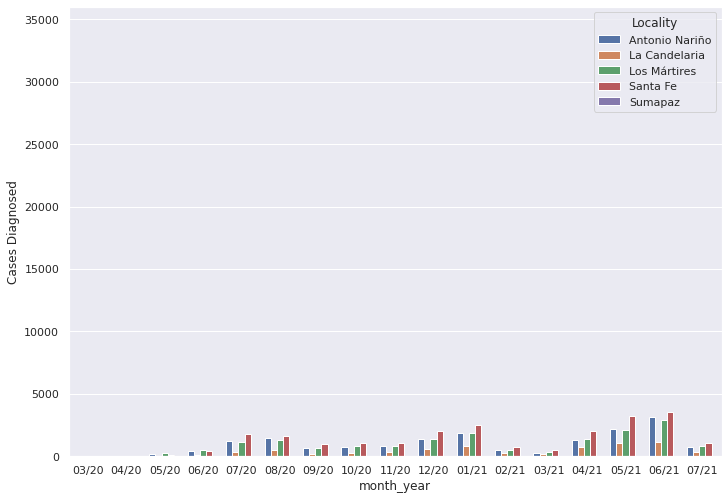

In [188]:
#The graphs will be divided in groups of 5 localities so as not to saturate it
group1_graph = sns.barplot(x='month_year', y='Cases Diagnosed', hue='Locality', data=df_covid2[df_covid2['Locality'].isin(['Sumapaz','La Candelaria','Los Mártires','Antonio Nariño','Santa Fe'])], saturation=0.8)
group1_graph.set(xticklabels=xlabels)
group1_graph.set(ylim=(0,36000))
group1_graph.plot

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f8ea8cbc6d0>>

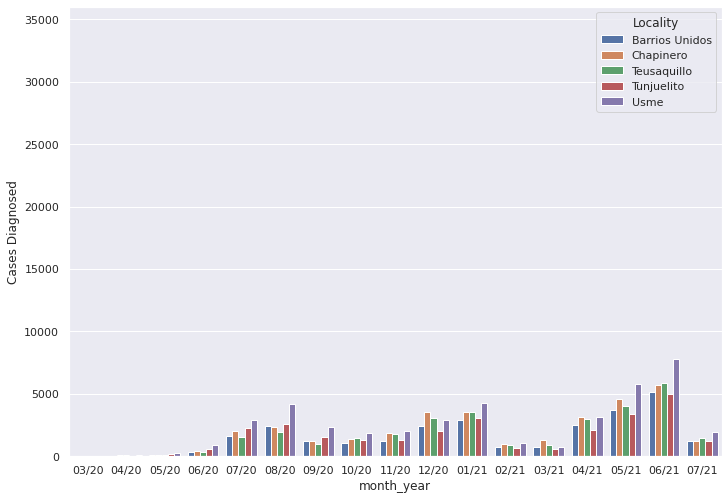

In [189]:
#The graphs will be divided in groups of 5 localities so as not to saturate it
group2_graph = sns.barplot(x='month_year', y='Cases Diagnosed', hue='Locality', data=df_covid2[df_covid2['Locality'].isin(['Barrios Unidos','Tunjuelito','Teusaquillo','Chapinero','Usme'])], saturation=0.8)
group2_graph.set(xticklabels=xlabels)
group2_graph.set(ylim=(0,36000))
group2_graph.plot

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f8ea8a1fb90>>

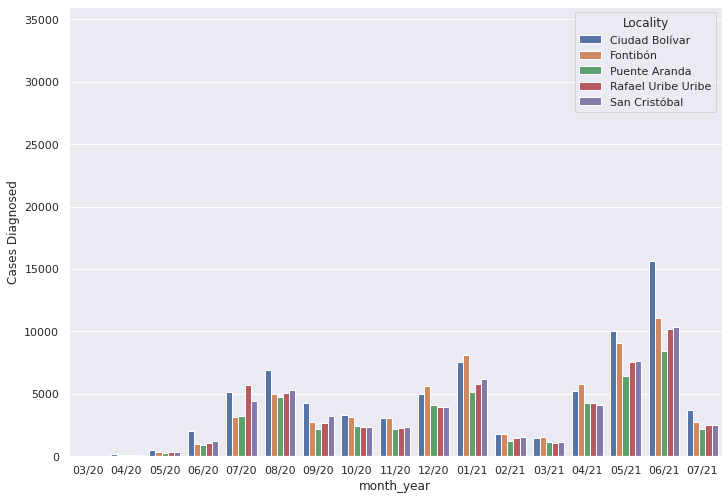

In [190]:
#The graphs will be divided in groups of 5 localities so as not to saturate it
group3_graph = sns.barplot(x='month_year', y='Cases Diagnosed', hue='Locality', data=df_covid2[df_covid2['Locality'].isin(['Puente Aranda','Rafael Uribe Uribe','San Cristóbal','Fontibón','Ciudad Bolívar'])], saturation=0.8)
group3_graph.set(xticklabels=xlabels)
group3_graph.set(ylim=(0,36000))
group3_graph.plot

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f8ea87bbe50>>

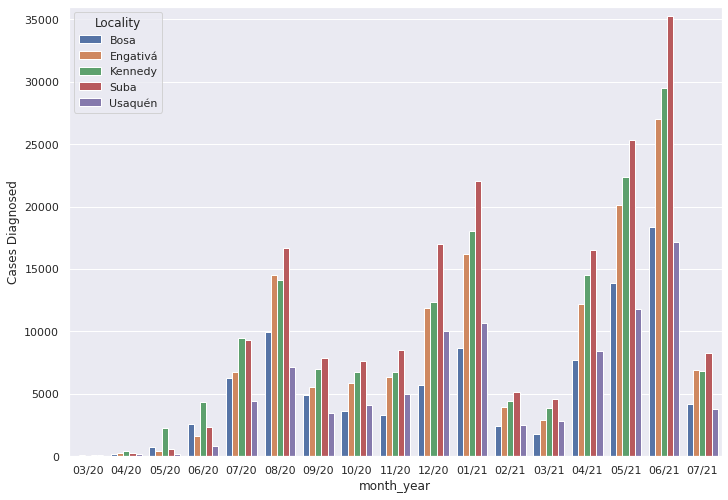

In [191]:
#The graphs will be divided in groups of 5 localities so as not to saturate it
group4_graph = sns.barplot(x='month_year', y='Cases Diagnosed', hue='Locality', data=df_covid2[df_covid2['Locality'].isin(['Usaquén','Bosa','Engativá','Kennedy','Suba'])], saturation=0.8)
group4_graph.set(xticklabels=xlabels)
group4_graph.set(ylim=(0,36000))
group4_graph.plot

<h1> Analysis <h1>
<p> Now that we have captured and cleanes the data we will be using for our project, it is time to start with the initial analysis of our data. <p>

Since the project will focus on determining the best places to open a bookstore, coffeeshops or book cafés we'll be mapping these businesses and training our models with the information from these.

We are also looking for places that have parks so that the business has the posibility of having an open air section in order to comply with current covid protocols established by the government.

In [192]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 

In [193]:
bogota_onehot1 = pd.get_dummies(bogota_venues[['Venue Category']],prefix="",prefix_sep="")
bogota_onehot1['Neighborhood'] = bogota_venues['Neighborhood']

first_column = bogota_onehot1.pop('Neighborhood')
bogota_onehot1.insert(0,'Neighborhood',first_column)

bogota_onehot1.head(n=10)

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,Bakery,Bar,Bistro,Bookstore,Breakfast Spot,Café,Cocktail Bar,Coffee Shop,College Bookstore,Comic Shop,Creperie,Cultural Center,Dessert Shop,Diner,Dog Run,Donut Shop,Electronics Store,Event Space,Fast Food Restaurant,Flea Market,Gas Station,Hobby Shop,Hotel,Ice Cream Shop,Italian Restaurant,Lounge,Miscellaneous Shop,Office,Paper / Office Supplies Store,Park,Pub,Record Shop,Residential Building (Apartment / Condo),Restaurant,Snack Place,Tapas Restaurant,Theme Park
0,Verbenal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Verbenal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Verbenal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Verbenal,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Verbenal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Verbenal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Verbenal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,Verbenal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Verbenal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,La Uribe,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [194]:
bogota_grouped1 = bogota_onehot1.groupby('Neighborhood').mean().reset_index()

In [195]:
columns=bogota_grouped1[:]
columns.drop(columns=["Neighborhood"],index=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Determine which might be the best amount of clusters in order to creat our kmeans Model
data = columns

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_


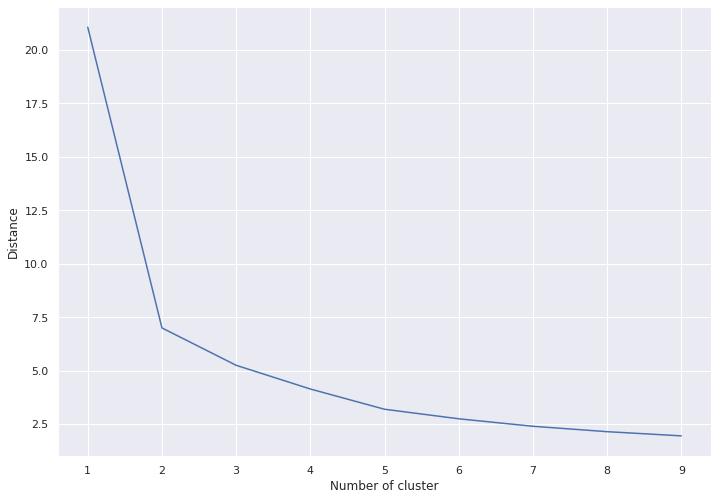

In [197]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Distance")
plt.show()

In [198]:
#We'll go with 5 clusters
kclusters = 5

bogota_cluster1 = bogota_grouped1.drop('Neighborhood',1)
kmeans2= KMeans(n_clusters=kclusters, random_state=0).fit(bogota_cluster1)

kmeans2.labels_[0:20]

array([2, 4, 1, 2, 1, 2, 0, 0, 0, 4, 1, 2, 0, 2, 1, 3, 3, 0, 1, 3],
      dtype=int32)

In [199]:
bogota_grouped1.insert(0,'Cluster Labels',kmeans2.labels_)

In [200]:
#Merge dataframes
bogota_merged = df_neighborhoods
bogota_merged = bogota_merged.join(bogota_grouped1.set_index('Neighborhood'),on='Neighborhood')

In [201]:
#Not all neighborhoods have the sort of businesses that were returned by Foursquare. Drop those empty values
bogota_merged = bogota_merged.dropna()

In [202]:
bogota_merged.head()

,Number,Neighborhood,Locality,Latitude,Longitude,Cluster Labels,American Restaurant,Asian Restaurant,Athletics & Sports,Bakery,Bar,Bistro,Bookstore,Breakfast Spot,Café,Cocktail Bar,Coffee Shop,College Bookstore,Comic Shop,Creperie,Cultural Center,Dessert Shop,Diner,Dog Run,Donut Shop,Electronics Store,Event Space,Fast Food Restaurant,Flea Market,Gas Station,Hobby Shop,Hotel,Ice Cream Shop,Italian Restaurant,Lounge,Miscellaneous Shop,Office,Paper / Office Supplies Store,Park,Pub,Record Shop,Residential Building (Apartment / Condo),Restaurant,Snack Place,Tapas Restaurant,Theme Park
1,9,Verbenal,usaquén,4.765150,-74.038394,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,La Uribe,usaquén,4.752400,-74.045013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,San Cristóbal Norte,usaquén,4.734501,-74.017543,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,Toberín,usaquén,4.747274,-74.043719,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.600000,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13,Los Cedros,usaquén,4.720422,-74.116078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
#Map the neighborhoods with their respective cluster
map_clusters = folium.Map(location=[bog_latitude,bog_longitude],zoom_start=11)

x= np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)] 
colors_array = cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(bogota_merged['Latitude'],bogota_merged['Longitude'],bogota_merged['Neighborhood'],bogota_merged['Cluster Labels']):
  label = folium.Popup(str(poi)+ 'Cluster'+ str(cluster), parse_html=True)
  folium.CircleMarker(
      [lat,lon],
      radius=5,
      popup=label,
      color=rainbow[int(cluster)-1],
      fill=True,
      fill_color=rainbow[int(cluster)-1],
      fill_opacity=0.7
  ).add_to(map_clusters)

map_clusters

According to our last map and the clusterization of the neighborhoods, those neighborhoods that belong to cluster #1 (Purple Cluster) are the ones who are most likely to have the most businesses related to books and cafes and that have parks in the vicinity.

With this information we will now proceed to check the amount of competition in case the user decides to open their business in one of these neighborhoods and check the amount of covid cases in the area in order to also take into account this information for the business location decision.



In [204]:
coffee_competitors = df_target_venues[df_target_venues['Venue Id'].isin(coffee_list)].groupby('Neighborhood').count().iloc[:,0:1]
coffee_competitors.rename(columns={'Neighborhood Latitude':'Coffee Shops'},inplace=True)

In [205]:
coffee_competitors.shape

(62, 1)

In [206]:
book_competitors = df_target_venues[df_target_venues['Venue Id'].isin(books_list)].groupby('Neighborhood').count().iloc[:,0:1]
book_competitors.rename(columns={'Neighborhood Latitude':'Book Shops'},inplace=True)

In [207]:
book_competitors.shape

(27, 1)

In [208]:
amount_parks = df_target_venues[df_target_venues['Venue Id'].isin(parks_list)].groupby('Neighborhood').count().iloc[:,0:1]
amount_parks.rename(columns={'Neighborhood Latitude':'Parks'},inplace=True)

In [209]:
amount_parks.shape

(75, 1)

In [210]:
count_merge = coffee_competitors.merge(book_competitors,on='Neighborhood',how='outer')
count_merge = count_merge.merge(amount_parks,on='Neighborhood',how='outer')

In [211]:
count_merge = count_merge.merge(df_neighborhoods.iloc[:,1:3],on='Neighborhood',how='outer')

In [212]:
count_merge = count_merge.merge(bogota_merged[['Neighborhood','Cluster Labels']][bogota_merged['Cluster Labels']==1],on='Neighborhood',how='right')

In [213]:
count_merge.sort_values(by=['Coffee Shops','Book Shops'],ascending=True)

,Neighborhood,Coffee Shops,Book Shops,Parks,Locality,Cluster Labels
2,San Cristóbal Norte,1.0,NaN,NaN,usaquén,1.0
19,La Academia,1.0,NaN,NaN,suba,1.0
11,Las Cruces,2.0,NaN,1.0,santa fe,1.0
1,La Uribe,3.0,1.0,NaN,usaquén,1.0
15,Capellanía,3.0,1.0,1.0,fontibón,1.0
21,Santa Isabel,3.0,NaN,1.0,los mártires,1.0
13,Bavaria,6.0,NaN,NaN,kennedy,1.0
17,Garcés Navas,6.0,NaN,2.0,engativá,1.0
0,Verbenal,7.0,1.0,1.0,usaquén,1.0
4,Country Club,7.0,1.0,2.0,usaquén,1.0


According to the information resumed in this table, in a top 5 of the best possible neighborhoods to start the new bookshop / café business would be:
<table>
<tr>
<th>Neighborhood</th>
<th>Locality</th>
</tr>
<tr>
<td>Santa Isabel</th>
<td>Los Mártires</th>
</tr>
<tr>
<td>Garcés Navas</th>
<td>Engativá</th>
</tr>
<tr>
<td>Las Cruces</th>
<td>Santa fe</th>
</tr>
<tr>
<td>Capellanía</th>
<td>Fontibón</th>
</tr>
<tr>
<td>Verbenal</th>
<td>Usaquén</th>
</tr>
</table>

This is because these neighborhood don't have already a large amount of similar business and they have at least one park in the vicinity in order to consider having an open space area in the business with a park view

If the park view is not of interest to our client, we can also consider these neighborhoods:
<table>
<tr>
<th>Neighborhood</th>
<th>Locality</th>
</tr>
<tr>
<td>San Cristóbal Norte</th>
<td>Usaquén</th>
</tr>
<tr>
<td>La Academia</th>
<td>Suba</th>
</tr>
</table>

Now it is necesarry to check the covid cases behaviour in their corresponding locality so that this will also be considered in the final decision

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f8ea7ebd5d0>>

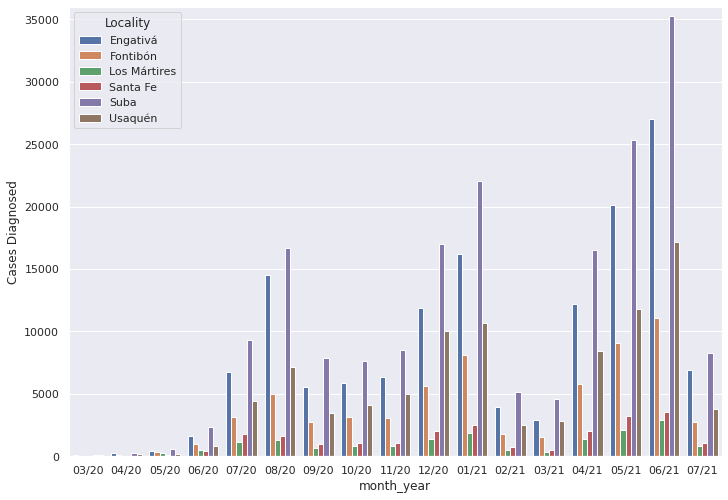

In [253]:
covid_final_graph = sns.barplot(x='month_year', y='Cases Diagnosed', hue='Locality', data=df_covid2[df_covid2['Locality'].isin(['Usaquén','Fontibón','Engativá','Los Mártires','Suba','Santa Fe'])], saturation=0.8)
covid_final_graph.set(xticklabels=xlabels)
covid_final_graph.set(ylim=(0,36000))
covid_final_graph.plot

As we can see in the graph, the localities of Suba, Engativá and Usaquén seem to have had the most amount of covid cases since the beginning of the pandemic and it's behaviour has been similar in the past month of 2021.

If our client decides to take this information into account, the neighborhood recommendation would be as follows:

<table>
<tr>
<th>Pos</th>
<th>Neighborhood</th>
<th>Locality</th>
</tr>
<tr>
<td>#1</td>
<td>Santa Isabel</td>
<td>Los Mártires</td>
</tr>
<tr>
<td>#2</td>
<td>Las Cruces</td>
<td>Santafé</td>
</tr>
<tr>
<td>#3</td>
<td>Capellania</td>
<td>Fontibón</td>
</tr>
<tr>
<td>#4</td>
<td>Verbenal</td>
<td>Usaquén</td>
</tr>
<tr>
<td>#5</td>
<td>San Cristobal Norte</td>
<td>Usaquén</td>
</tr>
<tr>
<td>#6</td>
<td>Garcés Navas</td>
<td>Engativá</td>
</tr>
<tr>
<td>#7</td>
<td>La Academia</td>
<td>Suba</td>
</tr>
</table>


In [278]:
recom_neigh = df_neighborhoods[df_neighborhoods['Neighborhood'].isin(['Santa Isabel','Las Cruces','Capellanía','Verbenal','San Cristóbal Norte','Garcés Navas','La Academia'])]

In [279]:
df_neighborhoods.head()

,Number,Neighborhood,Locality,Latitude,Longitude
0,1,Paseo de los Libertadores,Usaquén,4.791482,-74.033730
1,9,Verbenal,Usaquén,4.765150,-74.038394
2,10,La Uribe,Usaquén,4.752400,-74.045013
3,11,San Cristóbal Norte,Usaquén,4.734501,-74.017543
4,12,Toberín,Usaquén,4.747274,-74.043719


In [280]:
recom_neigh.head(n=7)

,Number,Neighborhood,Locality,Latitude,Longitude
1,9,Verbenal,Usaquén,4.765150,-74.038394
3,11,San Cristóbal Norte,Usaquén,4.734501,-74.017543
17,95,Las Cruces,Santa Fe,4.589044,-74.081261
56,115,Capellanía,Fontibón,4.669530,-74.131841
63,73,Garcés Navas,Engativá,4.713709,-74.119508
67,2,La Academia,Suba,4.786113,-74.049051
89,37,Santa Isabel,Mártires,4.601094,-74.101990


In [259]:
pos_array = [4,5,2,3,6,7,1]

In [ ]:
recom_neigh['Position'] = pos_array

In [282]:
recom_neigh = recom_neigh.sort_values(by=['Position'],ascending=True)
recom_neigh = recom_neigh.reset_index(drop = True)


In [283]:
recom_neigh

,Number,Neighborhood,Locality,Latitude,Longitude,Position
0,37,Santa Isabel,Mártires,4.601094,-74.101990,1
1,95,Las Cruces,Santa Fe,4.589044,-74.081261,2
2,115,Capellanía,Fontibón,4.669530,-74.131841,3
3,9,Verbenal,Usaquén,4.765150,-74.038394,4
4,11,San Cristóbal Norte,Usaquén,4.734501,-74.017543,5
5,73,Garcés Navas,Engativá,4.713709,-74.119508,6
6,2,La Academia,Suba,4.786113,-74.049051,7


In [285]:
icons = [[]]
final_map_bogota = folium.Map(location=[bog_latitude,bog_longitude],zoom_start=10)

for lat,lng,neigh,loc,pos in zip(recom_neigh['Latitude'],recom_neigh['Longitude'],recom_neigh['Neighborhood'],recom_neigh['Locality'],recom_neigh['Position']):
  label = '{}, {}'.format(neigh,loc)
  label = folium.Popup(label,parse_html=True)
  if pos == 1:
    folium.Marker(location =[lat, lng], popup=label,icon=folium.Icon(icon="trophy",prefix='fa',icon_color='gold')).add_to(final_map_bogota)
  elif pos == 2:
    folium.Marker(location =[lat, lng], popup=label,icon=folium.Icon(icon="trophy",prefix='fa',icon_color='gray')).add_to(final_map_bogota)
  elif pos == 3:
    folium.Marker(location =[lat, lng], popup=label,icon=folium.Icon(icon="trophy",prefix='fa',icon_color='darkred')).add_to(final_map_bogota)
  else:
    folium.Marker(location =[lat, lng], popup="#{}, {}, {}".format(pos,neigh,loc),icon=folium.Icon(icon="circle",prefix='fa',icon_color='green3')).add_to(final_map_bogota)
  
final_map_bogota